# What is IForest behavior according to the dataset dimension size?

## Test with 2 dimension dataset

In [1]:
import sys
sys.path.append('../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from scipy.stats import kde


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../")
X_brut, y_transform, full_dataset = dts.TwoD_V4_2_0()
X_brut.describe()

0            1
count  1515.000000  1515.000000
mean      0.043530    -0.200941
std       6.682732     6.705612
min      -9.965654    -9.993573
25%      -6.598318    -6.940761
50%      -0.144715    -0.265882
75%       6.782925     6.363242
max       9.997653     9.967206

In [4]:
dts.description

"Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus éloignées des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -5 et 5, X2 entre -7 et 7, size = 1500, distance euclidienne entre 5 et 7 (Grand cercle de rayon 7 et petit cercle de rayon 5) \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15."

In [5]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 3 columns):
0    1515 non-null float64
1    1515 non-null float64
2    1515 non-null object
dtypes: float64(2), object(1)
memory usage: 35.6+ KB


In [6]:
X_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 2 columns):
0    1515 non-null float64
1    1515 non-null float64
dtypes: float64(2)
memory usage: 23.8 KB


In [7]:
y_transform.describe()

0
count  1515.000000
mean      0.980198
std       0.198085
min      -1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000

In [8]:
y_transform

0
0     1
1     1
2     1
3     1
4     1
...  ..
1510 -1
1511 -1
1512 -1
1513 -1
1514 -1

[1515 rows x 1 columns]

In [9]:
full_dataset[0:1]

0         1  2
0  8.247529  4.387897  1

## Execution of Iforest to get the best performance

[[  13    2]
 [ 129 1371]]
ROC AUC
[0.8903333333333334]
Specificities
[0.8666666666666667]
min_roc_auc = 0.8903333333333334


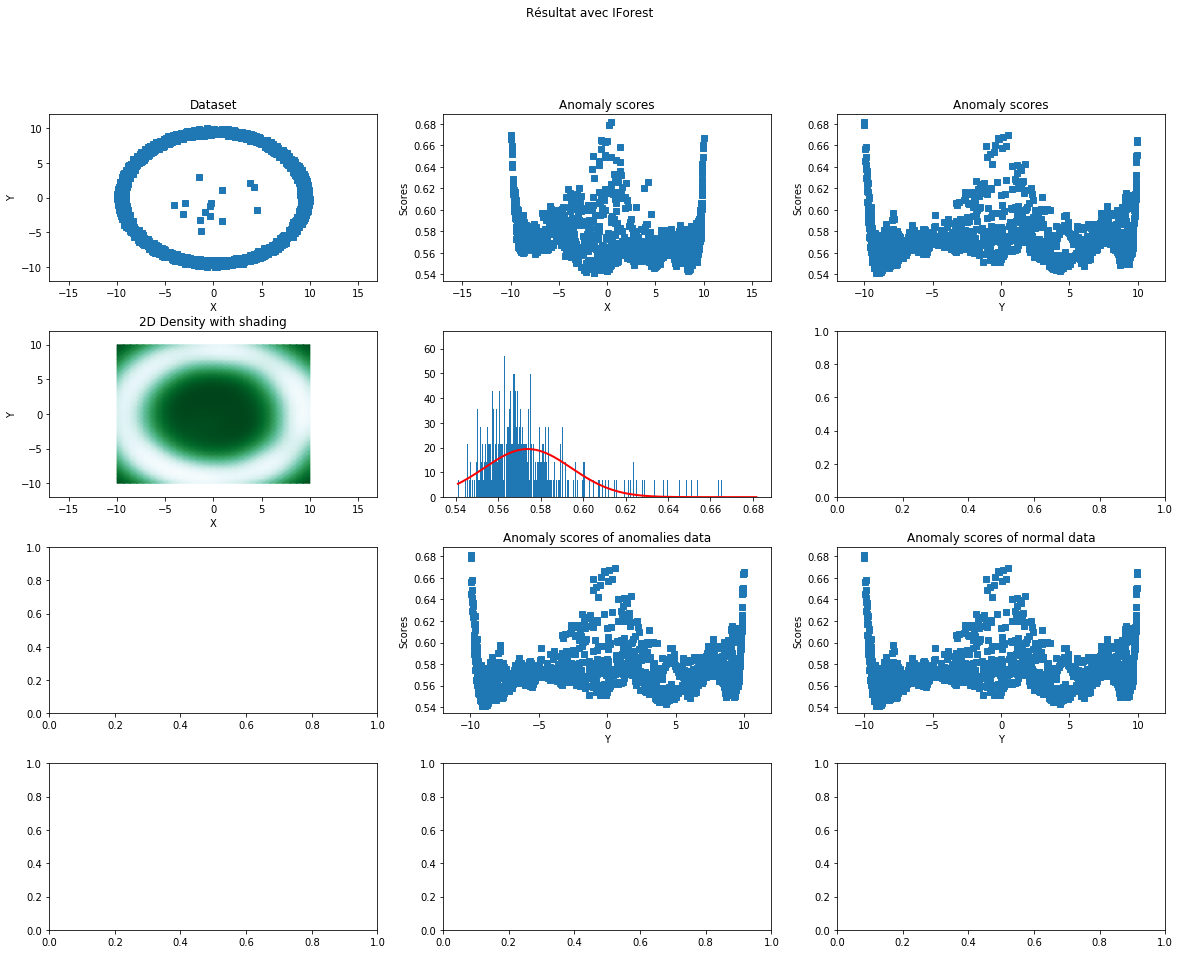

In [10]:
roc_aucs = []
specificities = []
#for i in range(10):
    # Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
func_IFD.fit(X_brut)
IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

# Matrice de confusion
ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
print(confusion_matrix(y_transform, IFD_y_pred_IF))
#ROC AUC
roc_aucs.append(roc_auc_score(y_transform, IFD_y_pred_IF))
# Specificity
specificities.append(specificity_score(y_transform, IFD_y_pred_IF))

x_lim = 17
y_lim = 12

#plt.figure(figsize=(30, 100))
#ax1, ax2, ax3
fig, axs = plt.subplots(4, 3, gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, figsize=(20, 15))
(ax1, ax2, ax3), (ax6, ax8, ax9 ), (ax7, ax4, ax5), (ax10, ax11, ax12) = axs
fig.suptitle('Résultat avec IForest')

ax1.plot(full_dataset[0], full_dataset[1], 's')
ax1.set_title("Dataset")
ax1.set(xlabel='X', ylabel='Y')
ax1.set_xlim([-x_lim, x_lim])
ax1.set_ylim([-y_lim, y_lim])

ax2.plot(full_dataset[0], IFD_scores, 's')
ax2.set_title("Anomaly scores")
ax2.set(xlabel='X', ylabel='Scores')
ax2.set_xlim([-x_lim, x_lim])
#ax2.set_ylim([0, 1])

ax3.plot(full_dataset[1], IFD_scores, 's')
ax3.set_title("Anomaly scores")
ax3.set(xlabel='Y', ylabel='Scores')
#ax3.set_ylim([0, 1])
ax3.set_xlim([-y_lim, y_lim])

ax4.plot(full_dataset[1], IFD_scores, 's')
ax4.set_title("Anomaly scores of anomalies data")
ax4.set(xlabel='Y', ylabel='Scores')
#ax4.set_ylim([0, 1])
ax4.set_xlim([-y_lim, y_lim])

ax5.plot(full_dataset[1], IFD_scores, 's')
ax5.set_title("Anomaly scores of normal data")
ax5.set(xlabel='Y', ylabel='Scores')
#ax5.set_ylim([0, 1])
ax5.set_xlim([-y_lim, y_lim])

#data = np.toarray()
nbins = 30
k = kde.gaussian_kde(X_brut.T)
xi, yi = np.mgrid[X_brut[0].min():X_brut[0].max():nbins*1j, 
                  X_brut[1].min():X_brut[1].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax6.set_title('2D Density with shading')
ax6.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
ax6.set(xlabel='X', ylabel='Y')
ax6.set_xlim([-x_lim, x_lim])
ax6.set_ylim([-y_lim, y_lim])
#ax6.contour(xi, yi, zi.reshape(xi.shape) )

count_scores, bins_scores, ignored_scores = ax8.hist(IFD_scores, len(IFD_scores), density=True)
sigma_scores = np.std(IFD_scores)
mu_scores = np.mean(IFD_scores)
ax8.plot(bins_scores, 1/(sigma_scores * np.sqrt(2 * np.pi)) * np.exp( - (bins_scores - mu_scores)**2 / (2 * sigma_scores**2)), linewidth=2, color='r')

#for i, line in enumerate(ax.lines):
#    ax.lines.pop(i)
#    line.remove()
#fig.show()

#from IPython.display import Image  
#Image(graph.write_png('./filename.png'))

#creates a new empty image, RGB mode, and size 400 by 400.
#new_im = Image.new('RGB', (2156,2*im_size[1]))

#visu.plot_2D_without_link(full_dataset[0], full_dataset[1],'X', 'Y', "Dataset", 
#                          xmin=-x_lim, xmax=x_lim, ymin=-y_lim, ymax=y_lim).show()
#visu.plot_2D_without_link(full_dataset[0], IFD_scores,'Data X1', 'Scores', "Anomaly scores").show()
#visu.plot_2D_without_link(full_dataset[1], IFD_scores,'Data X2', 'Scores', "Anomaly scores").show()

#plt.savefig('inconstance_cputime.png')

print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

In [11]:
for i in range(func_IFD.n_trees):
    print("----------------------------------------- Tree N° "+str(i)+" ---------------------------------------------")
    tree = func_IFD.trees[i]
    sample = func_IFD.samples[i]
    print(sample)
    print(tree.height_limit)
    print(tree.current_height)
    print(tree.split_by)
    print(tree.split_value)
    print(tree.right)
    print(tree.left)
    print(tree.size)
    print(tree.exnodes)
    print(tree.n_nodes)
    print(tree.node_sample)
        

----------------------------------------- Tree N° 0 ---------------------------------------------
[438, 1384, 792, 184, 4, 1049, 406, 972, 771, 786, 886, 695, 876, 1281, 1450, 646, 376, 600, 774, 253, 793, 1319, 212, 1326, 475, 587, 958, 851, 590, 881, 1184, 144, 1258, 67, 1008, 127, 164, 1250, 1412, 1503, 389, 468, 118, 1207, 229, 1093, 147, 1385, 1224, 1241, 113, 1491, 449, 528, 748, 245, 534, 1330, 398, 78, 805, 1113, 565, 852, 672, 328, 442, 451, 1230, 1083, 1045, 1066, 601, 60, 1056, 526, 1364, 340, 1447, 174, 904, 759, 1439, 897, 136, 700, 985, 1120, 755, 321, 131, 361, 717, 64, 1345, 455, 206, 1020, 938, 818, 1358, 831, 1377, 1479, 743, 1060, 1211, 1221, 647, 591, 1349, 795, 941, 1133, 1303, 1225, 224, 885, 867, 1187, 883, 53, 914, 751, 1152, 381, 387, 149, 1239, 1047, 618, 987, 476, 1240, 509, 290, 73, 630, 236, 1015, 1286, 1421, 244, 296, 1387, 1461, 505, 834, 104, 28, 1309, 313, 1232, 143, 1002, 571, 1257, 263, 860, 1389, 502, 1353, 539, 300, 1192, 666, 992, 782, 1098, 1136, 

[array([[-4.51839321e-01,  9.77714782e+00],
       [-8.37127127e-01,  9.67352514e+00],
       [-1.79196780e+00, -9.52115045e+00],
       [-3.84622443e+00, -8.56633781e+00],
       [-4.65021087e+00,  7.97135954e+00],
       [-8.05349192e+00,  4.79479361e+00],
       [-4.67253961e+00, -8.19901527e+00],
       [-4.14355147e+00, -8.62264265e+00],
       [-9.37327595e+00,  1.87923552e+00],
       [ 9.22262578e+00, -9.65380639e-01],
       [-2.77957110e+00, -9.00372945e+00],
       [ 3.78267004e+00,  8.90683446e+00],
       [ 4.10731352e-01, -9.86112581e+00],
       [ 8.90925879e+00,  4.45333765e+00],
       [-9.48231343e+00,  2.34063291e+00],
       [ 7.20115731e+00,  6.84668777e+00],
       [ 8.82385523e+00,  3.53699068e+00],
       [-8.21020384e+00,  5.54628514e+00],
       [-1.49076581e+00, -9.68581825e+00],
       [ 7.90551688e+00, -4.86089064e+00],
       [ 3.77178872e+00,  8.45893733e+00],
       [ 8.14486201e+00,  5.41863036e+00],
       [-4.86444778e+00, -8.53357033e+00],
       [ 2

[array([[-2.42715862e+00,  8.87704639e+00],
       [-6.69251688e+00, -6.95459313e+00],
       [ 7.66950471e+00, -5.75720708e+00],
       [-2.34139900e-01, -7.22388139e-01],
       [-8.35806424e+00, -5.07057414e+00],
       [-8.22428199e+00, -4.63701271e+00],
       [-5.03600416e+00, -7.95683274e+00],
       [-9.60845942e+00, -1.80633617e+00],
       [-9.22474660e+00,  2.27804420e+00],
       [ 8.29501550e+00, -3.54585563e+00],
       [ 9.80766010e+00,  1.26033423e+00],
       [-9.91459492e+00,  1.60387982e-01],
       [-5.30450315e-01,  9.46133825e+00],
       [ 5.58770920e+00, -7.64446667e+00],
       [-1.37565991e+00, -9.13560844e+00],
       [ 8.90109460e+00, -2.75559153e+00],
       [-3.39857233e+00,  9.38319338e+00],
       [ 6.54683226e+00,  6.93092215e+00],
       [ 7.98574117e-03,  9.45488906e+00],
       [ 9.37749218e+00, -2.62783048e+00],
       [-8.82911944e+00,  1.99120540e+00],
       [ 3.07508877e+00,  8.63306679e+00],
       [-1.84889545e+00, -9.66851537e+00],
       [-3

[array([[-9.13320426e+00, -8.70513372e-01],
       [-7.38611505e+00,  6.36546297e+00],
       [ 6.68524339e-01,  9.14211228e+00],
       [-8.15896689e+00,  4.65990967e+00],
       [ 3.97200559e+00,  8.78311510e+00],
       [ 8.44939055e+00,  4.03625625e+00],
       [ 4.06048485e+00,  9.06064750e+00],
       [ 8.88193617e+00, -2.38767821e+00],
       [-1.13894888e+00, -9.09287137e+00],
       [-7.30752095e+00,  6.29429651e+00],
       [ 7.32902858e+00, -6.20095448e+00],
       [ 8.34225406e+00, -3.84158536e+00],
       [ 8.45748603e+00,  3.23661354e+00],
       [-1.25604359e+00,  9.59747107e+00],
       [-8.44519999e+00,  3.51796426e+00],
       [ 9.68154855e+00,  6.13361226e-01],
       [ 4.53066612e+00, -8.53379579e+00],
       [-7.23355860e+00,  6.29831803e+00],
       [-5.57335890e+00, -7.41339200e+00],
       [ 3.81070744e+00,  8.68476405e+00],
       [ 8.15055063e+00,  5.31112806e+00],
       [-5.64887140e+00,  7.75971383e+00],
       [-3.88712592e+00, -9.21257387e+00],
       [ 9

[array([[-8.35039062e+00, -4.48112709e+00],
       [-6.75765436e+00,  6.77146338e+00],
       [-5.47928478e+00,  7.38593576e+00],
       [-6.55477305e+00,  6.39283298e+00],
       [ 8.50452927e+00,  3.30018628e+00],
       [-4.48696508e+00, -8.30097442e+00],
       [ 4.13043191e-01,  9.71333706e+00],
       [-2.42715862e+00,  8.87704639e+00],
       [ 8.82947587e+00,  2.09249819e+00],
       [ 2.48538175e+00,  8.85974366e+00],
       [ 8.55297858e-01,  9.39330867e+00],
       [-1.71757382e+00, -9.55841577e+00],
       [ 7.11698869e+00, -6.46071404e+00],
       [-8.55700984e+00,  4.88039005e+00],
       [-9.57418017e+00, -2.63445515e+00],
       [ 5.34764431e+00, -8.10942995e+00],
       [ 6.46091251e-01,  9.81988398e+00],
       [ 3.55713700e+00, -9.05072906e+00],
       [ 1.71711362e+00, -9.29117152e+00],
       [ 1.46365047e-01,  9.19238079e+00],
       [ 8.12851475e-02, -9.04501921e+00],
       [-7.51964637e+00,  5.15149770e+00],
       [ 8.50523890e+00, -4.06941818e+00],
       [ 9

[array([[-9.0753364 ,  4.03964322],
       [-2.78200781, -9.5334088 ],
       [-9.69495223,  1.67524096],
       [-3.86457349,  8.96441282],
       [-3.90184645,  8.37101889],
       [-9.79641043, -0.26588213],
       [ 6.74325174,  6.29528122],
       [-9.22544651,  2.92687436],
       [ 3.79085829, -9.13132353],
       [ 2.53061761, -8.90185301],
       [-7.93543179,  5.43796997],
       [ 6.07617751,  6.77033527],
       [ 7.17790128,  5.48583478],
       [-7.34584614,  5.44028521],
       [-9.64944618, -1.5678343 ],
       [ 8.2950155 , -3.54585563],
       [ 2.97488232, -9.2988004 ],
       [-9.11532893, -1.86865203],
       [-6.26364241, -7.30593956],
       [-0.45183932,  9.77714782],
       [ 8.5052389 , -4.06941818],
       [-9.12257202, -2.9899913 ],
       [-1.34257225, -9.04445711],
       [ 8.99925504, -2.50414959],
       [ 9.65924616, -1.03539236],
       [-1.25604359,  9.59747107],
       [-3.78260974, -8.48706062],
       [ 9.40157447, -1.62371736],
       [-9.1713417 

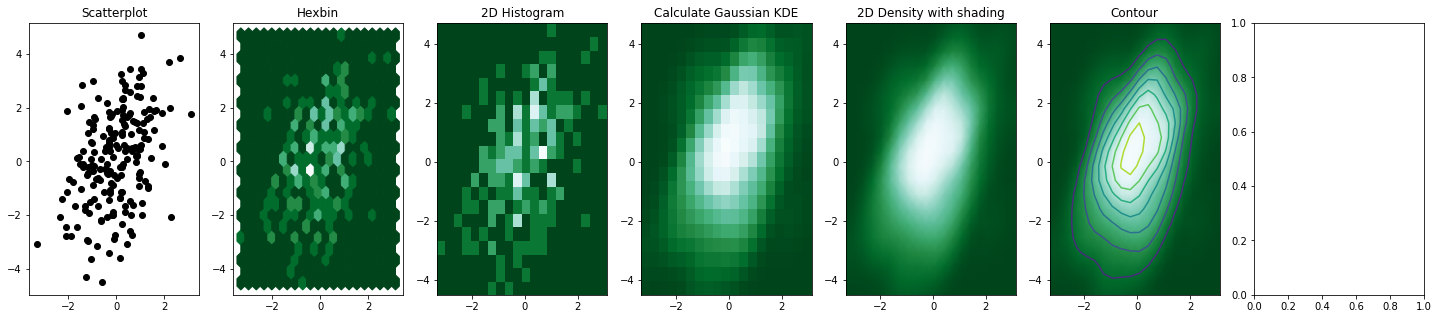

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(25, 5))

# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)

# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

#IFD_y_pred_IF, IFD_scores
# contour
#xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
#axes[6].set_title('Contour')
#xxxx, dddd = axes[6].pcolormesh(X_brut[0], X_brut[1], IFD_scores[0], shading='gouraud', cmap=plt.cm.BuGn_r)
#axes[6].contour(X_brut[0], X_brut[1], IFD_scores[0])


In [13]:
data

array([[ 7.09181268e-01,  1.50716226e+00],
       [ 1.55612177e+00,  1.86611875e+00],
       [ 4.56427356e-01,  5.08799686e-01],
       [-1.72212335e+00, -1.66276273e+00],
       [ 1.54744398e-02, -6.27966860e-01],
       [ 7.95119421e-01,  1.47993683e+00],
       [ 1.14013119e+00,  8.76768333e-01],
       [-6.43286253e-01, -2.20344526e+00],
       [ 2.30265820e+00, -2.06283925e+00],
       [-1.36781823e-01, -8.66855090e-01],
       [-1.54780117e-01,  1.58487998e-01],
       [ 3.63096849e-01, -1.90011390e+00],
       [ 2.94288733e-01, -8.82631620e-02],
       [-3.08851344e-01,  1.23192560e+00],
       [-3.99586234e-01,  2.16588728e+00],
       [-1.47082437e-01, -2.01728045e+00],
       [-3.69824711e-01, -2.08053934e+00],
       [ 5.62329874e-01,  1.81067385e+00],
       [ 2.48033256e-01,  9.78411673e-01],
       [-9.73207435e-01,  1.21693259e+00],
       [ 2.34655783e-01, -2.32296313e+00],
       [-1.97105097e+00, -6.68313439e-01],
       [ 1.18475324e+00, -7.46312033e-01],
       [ 6.

In [14]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],'D': ['D0', 'D1', 'D2', 'D3']},index=[0, 1, 2, 3]) 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],'C': ['C4', 'C5', 'C6', 'C7'],'D': ['D4', 'D5', 'D6', 'D7']},index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],'C': ['C8', 'C9', 'C10', 'C11'],'D': ['D8', 'D9', 'D10', 'D11']},index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],'D': ['D2', 'D3', 'D6', 'D7'],'F': ['F2', 'F3', 'F6', 'F7']},index=[2, 3, 6, 7])

In [15]:
result = pd.concat([df1, df3, df4], axis=1, sort=False)
result

A    B    C    D    A    B    C    D    B    D    F
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN   B2   D2   F2
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN   B3   D3   F3
6   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   B6   D6   F6
7   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   B7   D7   F7
8   NaN  NaN  NaN  NaN   A8   B8   C8   D8  NaN  NaN  NaN
9   NaN  NaN  NaN  NaN   A9   B9   C9   D9  NaN  NaN  NaN
10  NaN  NaN  NaN  NaN  A10  B10  C10  D10  NaN  NaN  NaN
11  NaN  NaN  NaN  NaN  A11  B11  C11  D11  NaN  NaN  NaN

In [16]:
pd.DataFrame(X_brut[0])

0
0     8.247529
1     9.069959
2     4.774715
3     7.201157
4     5.215616
...        ...
1510  3.769050
1511 -0.234140
1512 -1.421757
1513 -3.117512
1514 -0.378162

[1515 rows x 1 columns]

In [17]:
path = '../../datasets/synthetic_2D_data/synthetic_2D_data_2019-12-16 12:38:37.320551.csv'
dataset = pd.read_csv(path, header=None, index_col=None)
dataset.drop([0], inplace=True)
#dataset = dataset.reindex(range(len(dataset)))
dataset.reset_index(drop=True, inplace=True)
dataset

0         1  2
0     2.589003 -3.153838  1
1    -1.977298 -0.837864  1
2     0.203131  6.482506  1
3     3.962632  1.851749  1
4    -0.179331  4.810296  1
...        ...       ... ..
1510  0.252620  0.567904  0
1511 -0.676033 -0.049583  0
1512  0.550835 -0.313471  0
1513  0.388302 -0.448219  0
1514 -0.493088  0.277574  0

[1515 rows x 3 columns]

In [18]:
dataX=pd.DataFrame(X_brut[0])
dataX

0
0     8.247529
1     9.069959
2     4.774715
3     7.201157
4     5.215616
...        ...
1510  3.769050
1511 -0.234140
1512 -1.421757
1513 -3.117512
1514 -0.378162

[1515 rows x 1 columns]

In [19]:
dataX.mean()

0    0.04353
dtype: float64

In [20]:
np.mean(dataX)

0    0.04353
dtype: float64

In [21]:
util = datat.utilitaries()
X_AS = util.concat_2_columns(dataX=dataX, dataScores=IFD_scores)
X_AS

0         1
0     8.247529  0.545305
1     9.069959  0.560623
2     4.774715  0.569737
3     7.201157  0.570108
4     5.215616  0.560670
...        ...       ...
1510  3.769050  0.620360
1511 -0.234140  0.619505
1512 -1.421757  0.604620
1513 -3.117512  0.614538
1514 -0.378162  0.615482

[1515 rows x 2 columns]

## Execution of Iforest_mean

min = -9.92629248795101 max = 9.82851535625075 mean = -0.37729868107463493
min = -9.92629248795101 max = -0.6210786533016801 mean = -6.568548571503829
min = -7.315792836376258 max = 7.128741768589151 mean = -0.12535722367985552
min = -7.315792836376258 max = -0.3572208451971033 mean = -3.291611111337746
min = -9.072554270748078 max = -6.677860138648628 mean = -7.917014101339712
min = -5.46938487949016 max = -3.687030425669693 mean = -4.5244523934608045
min = -5.46938487949016 max = -4.6823416249049625 mean = -5.137881211554113
min = -8.389682710858605 max = -8.113110608227299 mean = -8.25142932907976
min = -4.933367337193285 max = -4.6823416249049625 mean = -4.807854481049124
min = -9.072554270748078 max = -8.178877074483069 mean = -8.657324096654936
min = -4.2774985415054605 max = -3.687030425669693 mean = -3.9777697038388404
min = -4.486965084253908 max = -3.8130716470563812 mean = -4.048753719593922
min = -7.315792836376258 max = -5.193046438737989 mean = -6.160016715946112
min = -7

min = -7.806778424841857 max = -7.137101308672564 mean = -7.471939866757211
min = -5.825660188628945 max = -5.685044256171718 mean = -5.769186493642423
min = -7.986311041865157 max = -7.492510705470218 mean = -7.799222723935947
min = -7.986311041865157 max = -7.9188464244724655 mean = -7.952578733168812
min = -6.0444191694257565 max = -5.546673512871064 mean = -5.830064380688158
min = -6.0444191694257565 max = -5.837692595675953 mean = -5.95033641824571
min = -6.0444191694257565 max = -6.0059084770734765 mean = -6.025163823249617
min = 7.044464642948572 max = 7.068950906167114 mean = 7.056707774557843
min = 7.418070864253295 max = 7.497262428979878 mean = 7.457666646616587
min = -4.884026799069361 max = -3.4078647170550913 mean = -4.132809222930054
min = -4.884026799069361 max = -4.255957053687294 mean = -4.589073156584946
min = -4.884026799069361 max = -4.774954111653937 mean = -4.829490455361649
min = -8.35039061989742 max = 8.574472318905471 mean = 2.930788964252276
min = 8.56828519

min = 0.9071421212432682 max = 1.1363034002067245 mean = 1.0041850916851014
min = 9.541464931070927 max = 9.89702514973972 mean = 9.719245040405323
min = 1.0645753829686342 max = 1.1363034002067245 mean = 1.1004393915876793
min = 1.4236825660370371 max = 2.2091333345429187 mean = 1.7540270652739909
min = -9.694746814383393 max = 9.873220383795331 mean = 1.7080866868143514
min = -9.694746814383393 max = -9.440163316107236 mean = -9.567455065245316
min = 1.4529495250070248 max = 1.6492047226860116 mean = 1.5559049103170264
min = -9.081434676588916 max = 8.864949453874047 mean = -3.0325227234219945
min = -9.081434676588916 max = -8.881082947551114 mean = -8.981258812070015
min = 2.4388570578766355 max = 5.355623643297559 mean = 3.9355660307058105
min = 2.4388570578766355 max = 3.8086256619007064 mean = 3.1443310067516768
min = -9.30321180717366 max = 9.108600543285707 mean = 2.8476557917670746
min = -9.30321180717366 max = -8.713316874430298 mean = -9.100125156993363
min = 2.8728116202727

min = 4.852442317141698 max = 5.535286905501671 mean = 5.193864611321684
min = 3.7717887230752116 max = 4.212808295942652 mean = 3.992298509508932
min = 5.963927412326534 max = 7.46601748064883 mean = 6.5933036352341485
min = 6.712927010576575 max = 7.6265288812933 mean = 7.242685826551434
min = 7.388601587784429 max = 7.6265288812933 mean = 7.507565234538864
min = 6.613831297269313 max = 7.46601748064883 mean = 7.0486950029377695
min = 6.1052321388405195 max = 6.9271328919132875 mean = 6.5161825153769035
min = 5.7748259654686995 max = 5.85648110262197 mean = 5.815653534045335
min = -0.5304503154903379 max = 4.715878699030212 mean = 1.734378878464579
min = -0.5304503154903379 max = 1.7079934806700727 mean = 0.27958313870263807
min = 9.070246314416472 max = 9.844840733382398 mean = 9.5403449315345
min = 9.070246314416472 max = 9.502612228676924 mean = 9.344732264835667
min = 9.612751886328141 max = 9.844840733382398 mean = 9.687054431558625
min = 1.3511393435145465 max = 1.7079934806700

min = -8.564837172649451 max = -7.340100282673812 mean = -7.853213580479104
min = 4.502146279719451 max = 5.091690483989723 mean = 4.750406798305263
min = -8.564837172649451 max = -7.962619643425975 mean = -8.263728408037712
min = 4.795875142783913 max = 5.091690483989723 mean = 4.8979143314329585
min = -7.724850845456634 max = -7.340100282673812 mean = -7.513978478687628
min = 4.671314410797695 max = 5.400885565079658 mean = 5.10472279514059
min = -7.358753898358266 max = -7.340100282673812 mean = -7.3494270905160395
min = 5.8636052762035975 max = 7.379840470422701 mean = 6.50721062403772
min = 5.8636052762035975 max = 6.482074458063363 mean = 6.16819901285079
min = 5.8636052762035975 max = 6.1577167185689525 mean = 5.981213462008578
min = 6.357052578882886 max = 6.482074458063363 mean = 6.417513080640405
min = 6.935097496263706 max = 7.379840470422701 mean = 7.100480943614848
min = 6.935097496263706 max = 6.986325464374862 mean = 6.960711480319285
min = 7.100660343398122 max = 7.3798

min = -0.14471489509948302 max = 9.966150740224236 mean = 5.802037243325959
min = -0.14471489509948302 max = 5.769222503279168 mean = 2.5032367404352662
min = -0.14471489509948302 max = 2.144133221181921 mean = 0.9999173875407582
min = -9.993572531283922 max = 9.735439068321812 mean = -4.044746550510529
min = -9.993572531283922 max = -9.047529716054934 mean = -9.468612892854996
min = -0.14471489509948302 max = 0.7984145818025272 mean = 0.3505164872452557
min = -9.993572531283922 max = -9.609237856489269 mean = -9.801405193886595
min = 0.4107313518265876 max = 0.7984145818025272 mean = 0.5836870544153859
min = 0.10910949740557108 max = 0.7567162180640103 mean = 0.406638859449837
min = -9.309227036123481 max = -9.047529716054934 mean = -9.153816753972698
min = -9.386538948788855 max = -9.326423545085284 mean = -9.356481246937069
min = 0.11315042750064384 max = 0.8552978579636221 mean = 0.5124134990921543
min = 0.11315042750064384 max = 0.35397446060949456 mean = 0.2335624440550692
min = 

min = -5.757207084597267 max = -3.841585363772417 mean = -4.88779626701763
min = -5.757207084597267 max = -4.9121681394827 mean = -5.308151704325477
min = -5.757207084597267 max = -5.633475571256545 mean = -5.695341327926906
min = -4.929756021965393 max = -4.9121681394827 mean = -4.920962080724047
min = -4.2525854210314495 max = -3.841585363772417 mean = -4.047085392401933
min = 8.60857237679424 max = 9.828632349430391 mean = 9.25061237060007
min = 8.60857237679424 max = 9.091257098400288 mean = 8.849272206516455
min = -4.546024701747156 max = -2.9686641224110666 mean = -3.5392413876164386
min = -3.103035338691093 max = -2.9686641224110666 mean = -3.03584973055108
min = -2.755591529686974 max = -0.02859851318179452 mean = -1.40876647477147
min = -2.755591529686974 max = -1.920277496025783 mean = -2.3379345128563784
min = 9.033207670031542 max = 9.091257098400288 mean = 9.062232384215914
min = 9.296520585058305 max = 9.828632349430391 mean = 9.484727466315514
min = 9.296520585058305 max

min = -8.205036566734485 max = -7.820374687295367 mean = -8.072419368121873
min = -5.326105687893273 max = -4.884026799069361 mean = -5.105066243481318
min = -5.825660188628945 max = -5.275493137602097 mean = -5.60689433477309
min = -7.679126287692963 max = -7.569757937840719 mean = -7.636301740212704
min = -5.60655730962741 max = -5.275493137602097 mean = -5.441025223614753
min = -7.069767479012282 max = -6.313055357803355 mean = -6.677116795188013
min = -6.755279548184983 max = -5.957997885840235 mean = -6.300158544392398
min = -6.187198199151977 max = -5.957997885840235 mean = -6.0725980424961055
min = -7.639330906563376 max = -6.5711649887168635 mean = -7.216149797287167
min = -7.639330906563376 max = -7.250532673062004 mean = -7.431144733477268
min = -9.956649029662042 max = -6.53477944841573 mean = -8.561284005911155
min = -9.956649029662042 max = -8.563850848616365 mean = -9.104438092842328
min = -9.956649029662042 max = -9.120602086681039 mean = -9.485258032898095
min = 0.24127

min = 8.811444833966807 max = 9.701575891111156 mean = 9.239451062409064
min = 8.811444833966807 max = 9.188252164889944 mean = 9.010950058289295
min = 8.811444833966807 max = 8.999255036196338 mean = 8.91241307202432
min = -2.8915649693550916 max = -2.5041495936266784 mean = -2.6978572814908848
min = -3.6022982974200843 max = -0.6314096669848652 mean = -2.337920020538698
min = 9.054384821073263 max = 9.085824147699594 mean = 9.070104484386428
min = 9.246926228460321 max = 9.701575891111156 mean = 9.46795206652883
min = 9.246926228460321 max = 9.463522418749905 mean = 9.366241466529317
min = -3.2271782367633506 max = -2.1279496584945767 mean = -2.677563947628964
min = -2.9131896031569826 max = -1.2998575421595913 mean = -2.106523572658287
min = -1.3611490988589308 max = -1.0324004571689491 mean = -1.19677477801394
min = -0.0893994500553923 max = 9.967206261204923 mean = 5.65118349280873
min = -0.0893994500553923 max = 5.578848516495705 mean = 3.046737926656421
min = -0.0893994500553923

min = 0.9097756329398871 max = 9.99765291167559 mean = 8.956711404843713
min = -0.2033232410741288 max = 2.4607618757848044 mean = 0.776494782421121
min = -0.2033232410741288 max = 0.6688523344162363 mean = 0.2756675025889304
min = 9.179467622854169 max = 9.99765291167559 mean = 9.601245870038547
min = 9.03365472529032 max = 9.851251790930624 mean = 9.467371543461033
min = 1.0033040482289088 max = 2.4607618757848044 mean = 1.6779838861190641
min = 1.0033040482289088 max = 1.4629982439911091 mean = 1.2422121733566485
min = 8.962453547946456 max = 9.495522891959393 mean = 9.228988219952925
min = 2.6611778366144065 max = 5.460013428363234 mean = 4.170786874738669
min = 8.457486025599621 max = 9.13480856204567 mean = 8.715294897022243
min = 2.8261329898977507 max = 3.625216237526917 mean = 3.270232975309919
min = 8.457486025599621 max = 8.68501088127001 mean = 8.581870645586541
min = 3.6099100031278764 max = 3.625216237526917 mean = 3.6175631203273966
min = 8.990856940097194 max = 9.134808

min = -9.88924847895458 max = 9.885762604091948 mean = -0.7936404467284395
min = -9.406387110058924 max = 9.827672992554293 mean = 1.068035376802427
min = -9.88924847895458 max = -0.8692296299518532 mean = -6.951325681389821
min = -9.88924847895458 max = -7.124797068813383 mean = -8.761189361134102
min = -9.88924847895458 max = -8.77776186263236 mean = -9.251370415156057
min = -9.88924847895458 max = -9.290147115633486 mean = -9.583178826412148
min = -9.88924847895458 max = -9.584336224813272 mean = -9.700265450347128
min = -9.88924847895458 max = -9.740854853348427 mean = -9.815051666151504
min = -1.6058314418270232 max = -1.3940792920073657 mean = -1.5217094045614719
min = -1.7175738175362678 max = 1.049433235727495 mean = -0.6141750160751412
min = -1.7175738175362678 max = -1.174384466416651 mean = -1.4459791419764594
min = -9.174387009133193 max = -8.77776186263236 mean = -9.04718062361385
min = -2.8762317335703886 max = 0.5969832580785521 mean = -0.9870358910638164
min = -9.174387

min = -8.041426742309246 max = -6.752776527046956 mean = -7.4780492220183135
min = -8.041426742309246 max = -7.569757937840719 mean = -7.778652281823189
min = -5.32282311438572 max = -5.2822371830207695 mean = -5.302530148703244
min = -5.713688659155116 max = -5.006812034587806 mean = -5.444524357531601
min = -5.987011775999397 max = -5.381574575288527 mean = -5.683535378281042
min = -7.0864506964850476 max = -6.752776527046956 mean = -6.919613611766001
min = -7.383482452714832 max = -7.327005557733675 mean = -7.349334529178397
min = -4.576245548440472 max = -3.418166244919167 mean = -4.071101705635106
min = -8.860702275772033 max = -8.366414962057718 mean = -8.624213734374178
min = -8.860702275772033 max = -8.651091744938405 mean = -8.75589701035522
min = -8.618645954728558 max = -8.366414962057718 mean = -8.492530458393137
min = -3.8472868330722463 max = -3.418166244919167 mean = -3.634384862264822
min = -9.050303173267023 max = -8.649273086713986 mean = -8.849788129990504
min = -6.2

min = -9.794301957468017 max = -9.489145431024776 mean = -9.601970661950864
min = -9.640628723075428 max = -9.440163316107236 mean = -9.540396019591332
min = 1.0043842952825344 max = 1.0626611782684885 mean = 1.0388262364261724
min = -9.315540471608863 max = -9.213959013366637 mean = -9.26474974248775
min = 2.181232840914713 max = 3.3517720740408907 mean = 2.5617393633397207
min = -9.496887161999716 max = -8.678276468142553 mean = -9.028359173478394
min = -9.496887161999716 max = -9.073588471489472 mean = -9.34077455087447
min = -8.75564515201631 max = -8.678276468142553 mean = -8.715943796082318
min = -9.111012546215203 max = -8.934577484099197 mean = -9.0227950151572
min = -8.943126032378645 max = -7.2071720686903795 mean = -8.070614892089
min = 3.9832036083241893 max = 5.657400005751817 mean = 4.63345605272881
min = 3.9832036083241893 max = 4.477026781876685 mean = 4.173267740379084
min = 3.9832036083241893 max = 4.005510682429055 mean = 3.994357145376622
min = -8.943126032378645 ma

min = 8.928853227053024 max = 9.186668714370146 mean = 9.088490882080725
min = 2.4189513280793453 max = 4.203494833536318 mean = 3.167911435275606
min = 2.4189513280793453 max = 2.8261329898977507 mean = 2.624097023156508
min = 3.4404327391339877 max = 4.203494833536318 mean = 3.7117258473947032
min = 9.278628006989685 max = 9.948916232661325 mean = 9.60593418992324
min = 9.278628006989685 max = 9.537684259677636 mean = 9.389027347294236
min = 9.278628006989685 max = 9.292247340298776 mean = 9.28543767364423
min = 0.5900872033553632 max = 0.6019192077435704 mean = 0.5960032055494668
min = 9.630439552903454 max = 9.948916232661325 mean = 9.77945966402644
min = 0.818328543617838 max = 2.3339807418337504 mean = 1.4154836688374857
min = 9.827454721943539 max = 9.948916232661325 mean = 9.888185477302432
min = -9.990851485146212 max = 9.966367046160592 mean = -0.41490931810440845
min = -9.893059246000202 max = 9.688370312734085 mean = -0.32000721610334526
min = -9.893059246000202 max = -0.39

min = -8.44952870219415 max = -7.531137406311768 mean = -7.8883824314664555
min = 5.106515819072847 max = 5.215616027145412 mean = 5.161065923109129
min = 5.105652641873076 max = 5.241968409544416 mean = 5.172458338782159
min = 6.081026479898359 max = 9.673818164532008 mean = 8.070888604786226
min = 6.081026479898359 max = 7.905516884268388 mean = 6.998581052719263
min = 6.081026479898359 max = 6.980092929128688 mean = 6.546150746520506
min = -7.915747345841758 max = -6.986874661315437 mean = -7.412699769998282
min = -7.915747345841758 max = -7.646306610388482 mean = -7.78102697811512
min = 6.428206431616562 max = 6.471583642059045 mean = 6.449895036837804
min = 6.675864329325499 max = 6.980092929128688 mean = 6.801582776036352
min = 6.675864329325499 max = 6.748791069654871 mean = 6.712327699490185
min = 7.075491890427347 max = 7.905516884268388 mean = 7.394457570643176
min = 7.075491890427347 max = 7.368536541473027 mean = 7.263420861560968
min = 7.075491890427347 max = 7.19895531780

min = -9.15374541600173 max = -8.943126032378645 mean = -9.050371009888963
min = -9.15374541600173 max = -9.050729057509958 mean = -9.085162946538569
min = -9.01755494368444 max = -8.943126032378645 mean = -8.992384448806282
min = 3.924329932232944 max = 5.3803832274241294 mean = 4.639953078253065
min = -8.831280072343697 max = -8.504778719036054 mean = -8.645827875696082
min = 3.924329932232944 max = 4.400833487478188 mean = 4.162581709855566
min = 4.181373018647925 max = 4.530666116692097 mean = 4.40472847168649
min = 4.840014267209863 max = 5.3803832274241294 mean = 5.055057217376745
min = 4.840014267209863 max = 4.908140890883264 mean = 4.874077579046563
min = 5.091690483989723 max = 5.3803832274241294 mean = 5.236036855706926
min = -8.109429945695139 max = -6.303399080209094 mean = -7.2572843597178105
min = 4.62940152141138 max = 6.1577167185689525 mean = 5.426321827395207
min = 4.62940152141138 max = 5.3476443100262046 mean = 4.924685183557215
min = 4.62940152141138 max = 4.79587

min = -2.5470158707936044 max = -0.3095871362897409 mean = -1.7869175335700078
min = 8.999255036196338 max = 9.041978508087286 mean = 9.020616772141812
min = -2.652653352304414 max = 0.30775677118555395 mean = -1.2852777000646238
min = 9.356422937683696 max = 9.641508231894237 mean = 9.537068331961235
min = 9.356422937683696 max = 9.531700718688695 mean = 9.456646757112773
min = -2.652653352304414 max = -1.2927709461898704 mean = -1.9727121492471422
min = -2.5111622419414665 max = -2.1523565508905484 mean = -2.3598681501613132
min = -2.5111622419414665 max = -2.457027946592365 mean = -2.484095094266916
min = 9.560709382038587 max = 9.641508231894237 mean = 9.601108806966412
min = 9.189164337621897 max = 9.785275447996089 mean = 9.467352677636185
min = -1.0572056896582789 max = 0.30775677118555395 mean = -0.4618216128471328
min = -1.0572056896582789 max = -0.655132698453798 mean = -0.8285106040201645
min = 9.189164337621897 max = 9.33404613183681 mean = 9.261605234729354
min = 9.5967480

min = -9.794301957468017 max = -9.486837706170242 mean = -9.658628826007217
min = 0.6195004595860638 max = 1.2794495011081324 mean = 0.9494749803470981
min = 1.7171136237271547 max = 2.6881112452428693 mean = 2.151382353986566
min = -9.291171521965683 max = -9.022039239893845 mean = -9.156605380929765
min = -9.283846789376126 max = -8.46255212758512 mean = -8.82705399990928
min = -9.283846789376126 max = -8.943126032378645 mean = -9.148639053762704
min = -9.283846789376126 max = -9.15374541600173 mean = -9.20001730910872
min = -8.644835809843594 max = -8.46255212758512 mean = -8.559066455031425
min = 3.2075810341031605 max = 4.502146279719451 mean = 3.6976827207415455
min = -8.533364410092405 max = -8.46255212758512 mean = -8.508840534001285
min = 4.3550224581584045 max = 8.2453692419367 mean = 6.460239961143707
min = -8.112136416614845 max = -7.4770548997811295 mean = -7.928257491850298
min = 4.3550224581584045 max = 5.657400005751817 mean = 5.030873917407426
min = -8.112136416614845 

min = 1.364912713565186 max = 2.132204687433568 mean = 1.642812459031295
min = 9.55032142640026 max = 9.885762604091948 mean = 9.718042015246104
min = 9.456840569114696 max = 9.579363108882552 mean = 9.518101838998625
min = 2.3347350415138632 max = 3.4206080244603068 mean = 2.8852209474403634
min = 2.3347350415138632 max = 2.744566259425764 mean = 2.606853256109498
min = 8.844895041874349 max = 9.365801000557957 mean = 9.138928196750186
min = 8.45888733317031 max = 9.325045999584496 mean = 8.872284826626803
min = 8.45888733317031 max = 8.596605430466703 mean = 8.527746381818506
min = 9.108600543285707 max = 9.325045999584496 mean = 9.216823271435102
min = 3.7690501162540824 max = 6.085002763867308 mean = 4.834989553498045
min = 1.5654760567843071 max = 8.934821642336889 mean = 6.914114556973861
min = 1.5654760567843071 max = 2.1530258452660416 mean = 1.8592509510251745
min = 8.189722534588046 max = 8.934821642336889 mean = 8.599069092290092
min = 8.189722534588046 max = 8.4983126846348

min = -9.8294175991333 max = 0.7272312502948566 mean = -5.800991783218359
min = -9.8294175991333 max = -5.968834428638584 mean = -8.162168286190505
min = -9.8294175991333 max = -8.426650754582598 mean = -9.101469884318647
min = -0.4851910724746009 max = 2.3295402918190984 mean = 0.6554634123067162
min = -9.796410433454048 max = -9.345079060187851 mean = -9.52394884055504
min = -0.2658821347949676 max = 0.2331415773163279 mean = -0.016370278739319843
min = -9.43285233918171 max = -9.345079060187851 mean = -9.402827796760592
min = 0.7836300441834307 max = 2.3295402918190984 mean = 1.6599926118986685
min = 0.7836300441834307 max = 1.3052802712639495 mean = 1.0444551577236902
min = 2.2215198403281957 max = 2.3295402918190984 mean = 2.275530066073647
min = -9.082083530131113 max = -8.426650754582598 mean = -8.683603124469604
min = 0.7725049527893653 max = 4.7343186808958535 mean = 3.064495886337575
min = 0.7725049527893653 max = 2.8437979884596665 mean = 1.8081514706245159
min = 3.907361923

min = 4.038651483557061 max = 5.746202635704464 mean = 5.104111790429316
min = 4.038651483557061 max = 4.225637429782882 mean = 4.132144456669971
min = -7.9354317926280045 max = -7.4447682174538885 mean = -7.771812423514987
min = 5.235523349680456 max = 5.437969971194666 mean = 5.349082592810329
min = -7.686997403426553 max = -7.4447682174538885 mean = -7.565882810440221
min = 5.7660196389049885 max = 7.040558705854642 mean = 6.4303235450598155
min = -7.320603816761648 max = -7.0316863409859165 mean = -7.176294030318725
min = 5.787784362599084 max = 6.065850753385022 mean = 5.926817557992053
min = -7.076537265949146 max = -6.428493067816504 mean = -6.641846783610274
min = 6.771463381886847 max = 6.7906138085610435 mean = 6.781038595223945
min = -6.48379766535042 max = -6.428493067816504 mean = -6.458347431025583
min = 6.813366048576768 max = 9.613315796535527 mean = 8.48613284637027
min = -6.1671271051366965 max = -3.1065553353928483 mean = -4.980753170033931
min = -6.1671271051366965 

min = 5.427441769918894 max = 6.796656230422067 mean = 6.12918183339339
min = 6.770335271402985 max = 8.262647147001154 mean = 7.313495749073416
min = 5.6313690490137445 max = 6.076177508015647 mean = 5.850094787426611
min = 6.373169434452169 max = 6.796656230422067 mean = 6.583703895228792
min = 6.698365297853312 max = 7.114910710870074 mean = 6.906638004361692
min = 6.620713862625284 max = 6.796656230422067 mean = 6.708685046523676
min = 4.041412029114071 max = 6.4549845669119525 mean = 4.986057838172743
min = 4.041412029114071 max = 4.664549777423414 mean = 4.396787831311905
min = 4.041412029114071 max = 4.330573626342705 mean = 4.185992827728388
min = 4.550615892367431 max = 4.664549777423414 mean = 4.607582834895423
min = 7.296224673455701 max = 8.144862007946994 mean = 7.687941582974325
min = 5.441638613273837 max = 6.4549845669119525 mean = 5.948311590092895
min = -9.79663243608722 max = 9.866556186040428 mean = -0.5374238685956161
min = -9.79663243608722 max = -1.00728840449896

min = -2.7113407839739185 max = -2.427158616362137 mean = -2.548952971625791
min = 8.946482765073142 max = 9.68874294361753 mean = 9.244578955423988
min = -2.0018494964579467 max = -1.7931534700280274 mean = -1.9151854487139497
min = 9.432341046030636 max = 9.68874294361753 mean = 9.560541994824083
min = 8.9237127445097 max = 9.967206261204923 mean = 9.446206657928144
min = 8.9237127445097 max = 9.339331238834244 mean = 9.117696956458948
min = 8.9237127445097 max = 8.955160641017091 mean = 8.939436692763396
min = -1.4559643422792077 max = -0.6362838632161765 mean = -1.0605907950362496
min = 9.777147815370721 max = 9.967206261204923 mean = 9.856843784764635
min = -0.5370846670384886 max = -0.4518393207209179 mean = -0.49446199387970324
min = 9.900517901264218 max = 9.967206261204923 mean = 9.93386208123457
min = 0.16456699795666374 max = 9.966150740224236 mean = 6.194300432735622
min = -9.697597134190334 max = 9.89702514973972 mean = -1.2165557146515182
min = -9.697597134190334 max = -7

min = -2.9436626270280826 max = -2.7792164894527356 mean = -2.8343104045639875
min = -8.683266236003572 max = 9.054384821073263 mean = 0.1855592925348457
min = -9.406387110058924 max = 9.621368499500397 mean = 0.10749069472073636
min = -9.649446183172849 max = 9.722646739081897 mean = 0.631464186568132
min = -9.649446183172849 max = -8.884014584991924 mean = -9.369613360310268
min = -9.649446183172849 max = -9.608210287218489 mean = -9.622038630968637
min = -9.608459422514573 max = -9.608210287218489 mean = -9.60833485486653
min = -9.27718915143874 max = -8.884014584991924 mean = -9.117188089651899
min = -0.8692296299518532 max = -0.7470023808920061 mean = -0.8081160054219296
min = 8.976755789043857 max = 9.722646739081897 mean = 9.20381636960676
min = -1.958159272517268 max = -0.784583237869672 mean = -1.3298425948610646
min = -1.958159272517268 max = -1.6460295088659898 mean = -1.802094390691629
min = -0.9305983601913291 max = -0.784583237869672 mean = -0.8575907990305005
min = 9.296

min = 9.565951938957092 max = 9.659246155280186 mean = 9.612599047118639
min = -0.2645260257157389 max = 9.966367046160592 mean = 6.152659299790343
min = -0.2645260257157389 max = 6.065850753385022 mean = 3.110757685326024
min = -0.2645260257157389 max = 2.9813852407226804 mean = 1.044938325667738
min = -0.2645260257157389 max = 0.8263664633886023 mean = 0.38076656753549076
min = -9.61621055866631 max = 9.498232106329207 mean = 1.771731665361715
min = -9.61621055866631 max = -9.579749327019234 mean = -9.597979942842773
min = -0.0535849892187894 max = 0.2036654313828876 mean = 0.09858249237496904
min = 0.1456670349608089 max = 0.2036654313828876 mean = 0.17466623317184826
min = -9.956649029662042 max = 9.720046049314675 mean = -0.04209576574143736
min = -9.956649029662042 max = -9.017244597057683 mean = -9.417377353259877
min = 0.5419532438688481 max = 0.8263664633886023 mean = 0.6841598536287252
min = 0.411025300363411 max = 0.7725049527893653 mean = 0.5917651265763881
min = 9.03365472

min = 4.912582336608119 max = 5.452568859382101 mean = 5.16687294300763
min = 8.605218936493321 max = 8.915559033862351 mean = 8.708742868743391
min = 8.605218936493321 max = 8.655532795762102 mean = 8.62279637274199
min = 3.185377869624769 max = 4.288728600766355 mean = 3.6546922000119655
min = -7.956354366663909 max = 7.567725846205544 mean = -0.3737635812278864
min = -7.956354366663909 max = -0.3758316005827069 mean = -4.847722131635615
min = 5.702826881199203 max = 7.667578236208364 mean = 6.672252235144637
min = 5.702826881199203 max = 6.605851115415831 mean = 6.2953551535856604
min = -7.956354366663909 max = -7.255488079699902 mean = -7.605921223181905
min = 6.298318029098848 max = 6.605851115415831 mean = 6.438756158557077
min = 6.298318029098848 max = 6.407818108767213 mean = 6.351119193369149
min = 6.521200298338506 max = 6.605851115415831 mean = 6.555605445474314
min = 6.6805327866182935 max = 7.667578236208364 mean = 7.096261451898486
min = 6.6805327866182935 max = 7.0682521

min = -2.7113407839739185 max = 0.2373457424526251 mean = -0.9784521110038011
min = -0.9305568557732896 max = 0.2373457424526251 mean = -0.4008225533470953
min = 0.35397446060949456 max = 9.828632349430391 mean = 6.282714187842305
min = 0.35397446060949456 max = 5.69952256120595 mean = 3.1088210473985454
min = 8.707849588735009 max = 9.885762604091948 mean = 9.316796437609755
min = 0.6685243388206583 max = 3.1085331519994033 mean = 2.2484747595902617
min = 8.88982387276588 max = 9.14211227761377 mean = 9.015968075189825
min = 2.7849157360808725 max = 3.1085331519994033 mean = 2.974881578814879
min = 3.0311958483643617 max = 3.1085331519994033 mean = 3.0698645001818825
min = 9.3555418774422 max = 9.885762604091948 mean = 9.584760041933139
min = 9.3555418774422 max = 9.458003521231692 mean = 9.405995280144719
min = 9.3555418774422 max = 9.369820010675808 mean = 9.362680944059004
min = 0.90952587683714 max = 2.7125631419961174 mean = 1.8110445094166288
min = 0.35397446060949456 max = 1.48

min = 6.980092929128688 max = 7.418070864253295 mean = 7.205618400497779
min = 6.980092929128688 max = 7.19895531780158 mean = 7.076095026228252
min = 7.241982516026255 max = 7.418070864253295 mean = 7.3351417747673056
min = 8.071457166611179 max = 8.856876237990269 mean = 8.515432603710297
min = 8.071457166611179 max = 8.359677451639843 mean = 8.257796225134486
min = 8.342254057152436 max = 8.359677451639843 mean = 8.350965754396139
min = 8.574472318905471 max = 8.856876237990269 mean = 8.708659887642154
min = -4.546024701747156 max = -4.255957053687294 mean = -4.400990877717225
min = -4.156630464864353 max = -3.861987354521617 mean = -4.009308909692985
min = -3.5458556262183567 max = 0.30775677118555395 mean = -1.469435467470591
min = -3.5458556262183567 max = -1.7398471867489924 mean = -2.434398706519208
min = -3.5458556262183567 max = -2.5041495936266784 mean = -2.8131791510912763
min = 8.999255036196338 max = 9.202563948891676 mean = 9.102179649604485
min = 8.855771859302635 max =

min = 9.476704471725656 max = 9.53688711109562 mean = 9.506795791410639
min = -0.03112652335467203 max = 0.019208914969915725 mean = -0.005958804192378153
min = -9.893059246000202 max = 9.948916232661325 mean = 0.5104917856595389
min = -9.993572531283922 max = 9.966367046160592 mean = -0.2872584845501697
min = -9.893059246000202 max = 0.1462361680796036 mean = -5.605515533645865
min = -9.893059246000202 max = -5.8169861371310425 mean = -8.198849052442505
min = -4.3704458280542715 max = -0.5030496442932062 mean = -2.3829653485894187
min = -9.574180167231216 max = -8.208825947225531 mean = -8.785106410667126
min = -3.0527607420548146 max = -2.480893427035131 mean = -2.7227031052892023
min = -2.634455146777661 max = -2.480893427035131 mean = -2.557674286906396
min = -8.661489977213954 max = -8.208825947225531 mean = -8.414188230320327
min = -8.661489977213954 max = -8.605297800265285 mean = -8.633393888739619
min = -8.385068403838197 max = -8.208825947225531 mean = -8.268051124707467
min 

min = -6.373865359091844 max = -6.09876412246772 mean = -6.252150820974734
min = -9.893059246000202 max = 9.909194763031651 mean = -1.0807284523353164
min = -5.835081109164716 max = 0.06720510238718093 mean = -2.615667974606775
min = -9.246861993901575 max = -7.4660685496983055 mean = -8.510297661354716
min = -4.3870990869896795 max = -2.6241651820798 mean = -3.6400361488353363
min = -9.200712107189801 max = -8.652428595378288 mean = -8.887810999886563
min = -4.187330509937454 max = -3.902995663070421 mean = -4.045163086503938
min = -4.3870990869896795 max = -3.829379463007992 mean = -4.098413750715564
min = -9.246861993901575 max = -8.795564046037194 mean = -9.060404473315218
min = -3.1668939564202385 max = -2.6241651820798 mean = -2.8955295692500194
min = -8.47818356733368 max = -7.4660685496983055 mean = -7.920649806597922
min = -8.47818356733368 max = -8.00894600597889 mean = -8.269648688118515
min = -8.47818356733368 max = -8.321816491042973 mean = -8.400000029188327
min = -7.6791

min = 7.040558705854642 max = 7.744445285989072 mean = 7.364191730820509
min = -6.48379766535042 max = -6.280102590403281 mean = -6.38195012787685
min = -6.53477944841573 max = -5.8501896530133415 mean = -6.192484550714536
min = -5.6414612563441775 max = -4.516218072937273 mean = -5.150368037969958
min = 7.023620287222464 max = 7.8377804965237345 mean = 7.403013329719546
min = -4.631304466521972 max = 0.16456699795666374 mean = -2.607463469885536
min = 8.041565881920082 max = 9.518355151991367 mean = 8.717353611329955
min = -4.631304466521972 max = -3.337124279746117 mean = -4.092883027498501
min = 8.041565881920082 max = 8.55330514937711 mean = 8.309460249235912
min = 8.398605400858198 max = 8.626234236543205 mean = 8.512419818700701
min = -4.606381993102747 max = -2.7113407839739185 mean = -3.383434297437843
min = -4.606381993102747 max = -3.612931585535245 mean = -4.109656789318996
min = -3.1462335477033663 max = -2.7113407839739185 mean = -2.899285969517075
min = 8.723373255691996 

min = -1.7178389400081269 max = -0.14471489509948302 mean = -1.0390491825997916
min = -9.445521817947007 max = -8.815987009095101 mean = -9.102804136791086
min = -2.167655913767524 max = -0.6936509961054433 mean = -1.3422990096517993
min = -6.8018856392830225 max = -3.5782551015025383 mean = -5.547450396915477
min = -7.9750928948431445 max = -6.789481510882276 mean = -7.195808454583061
min = -7.9750928948431445 max = -7.211506527580779 mean = -7.467983433631059
min = -7.9750928948431445 max = -7.596845511152916 mean = -7.7859692029980305
min = -6.604415682385545 max = -6.263642414218482 mean = -6.377290996736526
min = -6.8018856392830225 max = -5.74379225713442 mean = -6.222978760572491
min = -6.8018856392830225 max = -6.785543395481933 mean = -6.793714517382478
min = -6.161965972373034 max = -5.74379225713442 mean = -5.937610882167497
min = -8.38785182133618 max = -7.274320175182401 mean = -7.9849500540104446
min = -5.302677916484047 max = -3.5782551015025383 mean = -4.414108463695501

min = -9.091059852568502 max = -8.934577484099197 mean = -9.045262045936553
min = -9.091059852568502 max = -9.052921105323373 mean = -9.07293318639589
min = -8.782604636453751 max = -1.247285985934032 mean = -7.293505230309927
min = -8.782604636453751 max = -7.724850845456634 mean = -8.301208437705911
min = 2.507747951311554 max = 4.005510682429055 mean = 3.33716451383982
min = -8.782604636453751 max = -8.624975566982814 mean = -8.703790101718283
min = 4.219100931466524 max = 4.710447445412274 mean = 4.533620929225498
min = -7.761812181907269 max = -7.724850845456634 mean = -7.743331513681952
min = 4.908140890883264 max = 9.621368499500397 mean = 7.432361955983703
min = 4.908140890883264 max = 7.345371944022367 mean = 6.347838269278917
min = -8.439766114773116 max = -7.2071720686903795 mean = -7.81154623667548
min = 4.908140890883264 max = 5.180344898509488 mean = 5.091188893348646
min = 5.106515819072847 max = 5.180344898509488 mean = 5.152204894170441
min = -7.73366881769612 max = -7

min = -7.890344279392853 max = -6.769420055185874 mean = -7.217285855996878
min = -7.890344279392853 max = -7.493929363440522 mean = -7.692136821416687
min = 6.117690635213903 max = 6.428206431616562 mean = 6.283933379111704
min = 6.935097496263706 max = 7.044464642948572 mean = 6.994113941836531
min = 7.002779686297313 max = 7.044464642948572 mean = 7.023622164622942
min = 7.2133720738774825 max = 8.581097273818544 mean = 7.783900709604392
min = 7.2133720738774825 max = 7.497262428979878 mean = 7.352049906232594
min = 7.2133720738774825 max = 7.329028580599989 mean = 7.271200327238736
min = 7.368536541473027 max = 7.497262428979878 mean = 7.432899485226453
min = 8.062677591747839 max = 8.581097273818544 mean = 8.21575151297619
min = 8.062677591747839 max = 8.147774019727201 mean = 8.093969592695407
min = 8.505238901627479 max = 9.99765291167559 mean = 9.204760828956003
min = -4.06941818336405 max = -0.11381376645057095 mean = -2.4328058237070516
min = -4.06941818336405 max = -2.650132

min = 9.335067672305623 max = 9.458003521231692 mean = 9.4103172292597
min = 9.335067672305623 max = 9.393308668417161 mean = 9.364188170361391
min = 0.00798574116841344 max = 0.90952587683714 mean = 0.45875580900277674
min = 9.468593612062284 max = 9.901649238436914 mean = 9.623641483595678
min = 9.468593612062284 max = 9.612751886328141 mean = 9.545841553616782
min = -2.84028357687394 max = 0.9087194623217788 mean = -1.6352110528637755
min = 9.574771374693242 max = 9.612751886328141 mean = 9.594998110114735
min = -0.959069684694292 max = 0.7272312502948566 mean = -0.03237246791318474
min = -0.959069684694292 max = -0.2516258978627981 mean = -0.605347791278545
min = 0.35397446060949456 max = 0.7272312502948566 mean = 0.5406028554521756
min = 5.441638613273837 max = 9.508832390809042 mean = 7.955901055364726
min = 5.229346788392327 max = 7.690428390535906 mean = 6.433427373220986
min = 6.712927010576575 max = 7.905957698111137 mean = 7.2908003900556935
min = 6.712927010576575 max = 7.1

min = 4.163488188907858 max = 5.135467633032672 mean = 4.616523904769321
min = -9.855702756225105 max = 9.948358773549757 mean = -0.16648685764728266
min = -9.855702756225105 max = -0.2033232410741288 mean = -5.815484618052975
min = -9.855702756225105 max = -5.835081109164716 mean = -8.132047888653302
min = -4.5915852466836915 max = 5.091690483989723 mean = 0.1809756857996571
min = -4.5915852466836915 max = 0.10910949740557108 mean = -2.0402476540824113
min = -9.212573872574195 max = -8.178877074483069 mean = -8.679462778965569
min = -9.212573872574195 max = -8.726877021626374 mean = -8.940979749414732
min = -9.212573872574195 max = -8.984780253850868 mean = -9.09867706321253
min = -8.83968784960749 max = -8.726877021626374 mean = -8.783282435616933
min = -8.566337814332556 max = -8.178877074483069 mean = -8.417945808516405
min = -4.5915852466836915 max = -3.846224427471476 mean = -4.224959570822551
min = -1.5637872956855323 max = 0.10910949740557108 mean = -0.8791327547019392
min = -1

[[  15    0]
 [1500    0]]
ROC AUC
[0.5]
Specificities
[1.0]
min_roc_auc = 0.5


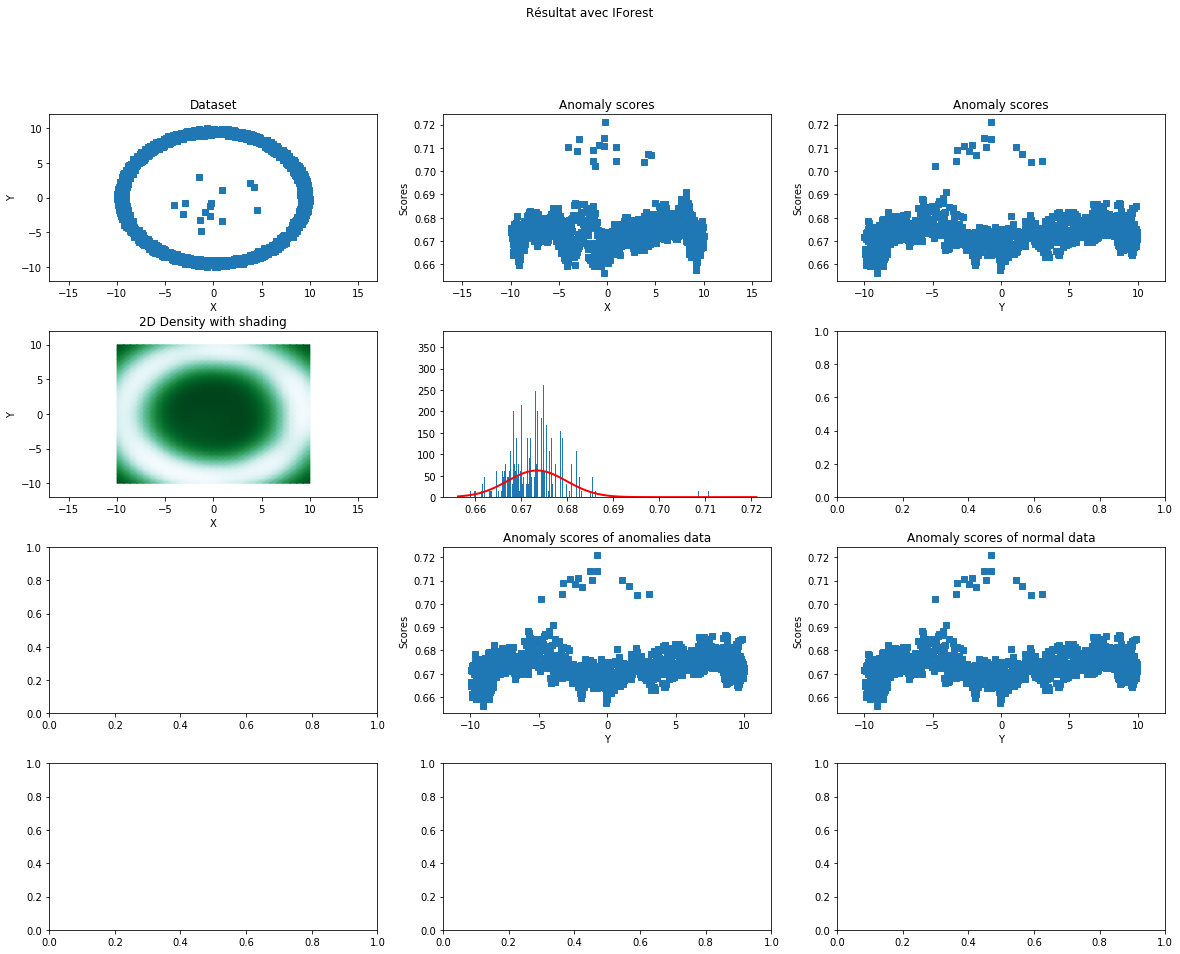

In [22]:
from IForest_DODiMDS import iforest_mean as IFM
roc_aucs = []
specificities = []
#for i in range(10):
    # Instanciation, fit and predict
func_IFM = IFM.IsolationForest(sample_size = max_samples, n_trees=n_trees)
func_IFM.fit(X_brut)
IFM_y_pred_IF, IFM_scores = func_IFM.predict(X=X_brut, threshold=threshold)

# Matrice de confusion
ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFM_y_pred_IF).ravel()
print(confusion_matrix(y_transform, IFM_y_pred_IF))
#ROC AUC
roc_aucs.append(roc_auc_score(y_transform, IFM_y_pred_IF))
# Specificity
specificities.append(specificity_score(y_transform, IFM_y_pred_IF))

x_lim = 17
y_lim = 12

#plt.figure(figsize=(30, 100))
#ax1, ax2, ax3
fig, axs = plt.subplots(4, 3, gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, figsize=(20, 15))
(ax1, ax2, ax3), (ax6, ax8, ax9 ), (ax7, ax4, ax5), (ax10, ax11, ax12) = axs
fig.suptitle('Résultat avec IForest')

ax1.plot(full_dataset[0], full_dataset[1], 's')
ax1.set_title("Dataset")
ax1.set(xlabel='X', ylabel='Y')
ax1.set_xlim([-x_lim, x_lim])
ax1.set_ylim([-y_lim, y_lim])

ax2.plot(full_dataset[0], IFM_scores, 's')
ax2.set_title("Anomaly scores")
ax2.set(xlabel='X', ylabel='Scores')
ax2.set_xlim([-x_lim, x_lim])
#ax2.set_ylim([0, 1])

ax3.plot(full_dataset[1], IFM_scores, 's')
ax3.set_title("Anomaly scores")
ax3.set(xlabel='Y', ylabel='Scores')
#ax3.set_ylim([0, 1])
ax3.set_xlim([-y_lim, y_lim])

ax4.plot(full_dataset[1], IFM_scores, 's')
ax4.set_title("Anomaly scores of anomalies data")
ax4.set(xlabel='Y', ylabel='Scores')
#ax4.set_ylim([0, 1])
ax4.set_xlim([-y_lim, y_lim])

ax5.plot(full_dataset[1], IFM_scores, 's')
ax5.set_title("Anomaly scores of normal data")
ax5.set(xlabel='Y', ylabel='Scores')
#ax5.set_ylim([0, 1])
ax5.set_xlim([-y_lim, y_lim])

#data = np.toarray()
nbins = 30
k = kde.gaussian_kde(X_brut.T)
xi, yi = np.mgrid[X_brut[0].min():X_brut[0].max():nbins*1j, 
                  X_brut[1].min():X_brut[1].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax6.set_title('2D Density with shading')
ax6.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
ax6.set(xlabel='X', ylabel='Y')
ax6.set_xlim([-x_lim, x_lim])
ax6.set_ylim([-y_lim, y_lim])
#ax6.contour(xi, yi, zi.reshape(xi.shape) )

count_scores, bins_scores, ignored_scores = ax8.hist(IFM_scores, len(IFM_scores), density=True)
sigma_scores = np.std(IFM_scores)
mu_scores = np.mean(IFM_scores)
ax8.plot(bins_scores, 1/(sigma_scores * np.sqrt(2 * np.pi)) * np.exp( - (bins_scores - mu_scores)**2 / (2 * sigma_scores**2)), linewidth=2, color='r')

#for i, line in enumerate(ax.lines):
#    ax.lines.pop(i)
#    line.remove()
#fig.show()

#from IPython.display import Image  
#Image(graph.write_png('./filename.png'))

#creates a new empty image, RGB mode, and size 400 by 400.
#new_im = Image.new('RGB', (2156,2*im_size[1]))

#visu.plot_2D_without_link(full_dataset[0], full_dataset[1],'X', 'Y', "Dataset", 
#                          xmin=-x_lim, xmax=x_lim, ymin=-y_lim, ymax=y_lim).show()
#visu.plot_2D_without_link(full_dataset[0], IFM_scores,'Data X1', 'Scores', "Anomaly scores").show()
#visu.plot_2D_without_link(full_dataset[1], IFM_scores,'Data X2', 'Scores', "Anomaly scores").show()

#plt.savefig('inconstance_cputime.png')

print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

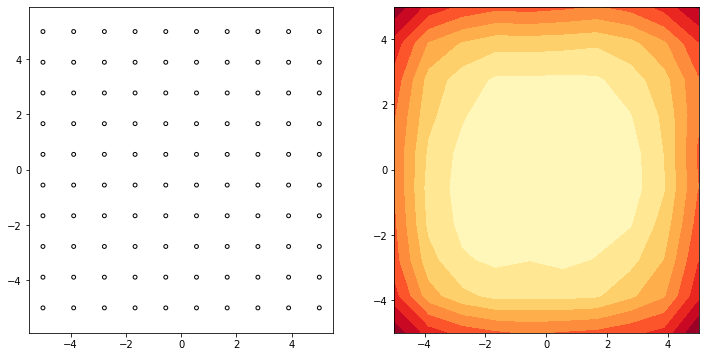

In [23]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
# Créer un jeu de données qui recouvre toute une surface ayant 10 colonnes et 10 lignes contenant 
#des valeurs entre -5. et 5.
xx, yy = np.meshgrid(np.linspace(-5., 5., 10), np.linspace(-5., 5, 10))

plt.scatter(xx,yy,s=15,c='None',edgecolor='k')
plt.axis("equal")

# Calculer le score du jeu de données présumé puis faire le dessin pour voir le résultat possible avec IForest
ax2 = f.add_subplot(122)
F0  = IFD.IsolationForest(sample_size = 256, n_trees=100)
xxx = np.c_[xx.ravel(), yy.ravel()]
F0.fit(pd.DataFrame(xxx))
IFM_y_pred_IF, S0 = F0.predict(X=pd.DataFrame(xxx), threshold=0.5)
S0 = S0.reshape(xx.shape)
levels = np.linspace(np.min(S0),np.max(S0), 10)
CS = ax2.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)


900
1515
2415
(2415,)
14
[[0.57070505 0.57434532 0.57034153 ... 0.58349756 0.58231558 0.58841843]
 [0.58670629 0.58753699 0.58307703 ... 0.58505906 0.58250517 0.58004338]
 [0.57947303 0.57573317 0.57587758 ... 0.59581512 0.59333685 0.59828508]
 ...
 [0.5536055  0.54604814 0.57810771 ... 0.5517751  0.57261283 0.59009098]
 [0.5544377  0.55728112 0.57843161 ... 0.56229056 0.57814366 0.5714533 ]
 [0.56419201 0.56748919 0.57716787 ... 0.62270534 0.61351155 0.62284901]]
[-5.         -4.65517241 -4.31034483 ... -1.42175709 -3.1175124
 -0.37816165]
[-5.         -5.         -5.         ... -3.21642388 -2.37382375
 -1.24728599]


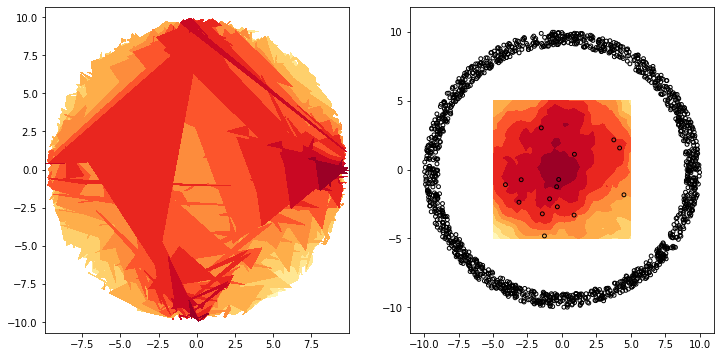

In [56]:
from math import sqrt
import eif as iso
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
#Nobjs = 500
Nobjs = 900
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
#X = pd.DataFrame(X)

X = X_brut.to_numpy()
x = X_brut[0].to_numpy()
y = X_brut[1].to_numpy()

#*****************************************************************************
F0  = IFD.IsolationForest(sample_size = 256, n_trees=200)
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)

#m_size = sqrt(len(x))
m_size = 30
xx, yy = np.meshgrid(np.linspace(-5., 5., m_size), np.linspace(-5., 5, m_size))

xxx = np.c_[xx.ravel(), yy.ravel()]
F0.fit(pd.DataFrame(X))
IFM_y_pred_IF, S0 = F0.predict(X=pd.DataFrame(xxx), threshold=0.6)
IFM_y_pred_IF1, S01 = F0.predict(X=pd.DataFrame(X), threshold=0.6)

print(len(S0))
print(len(S01))

S0 = np.append(S0, S01)
print(len(S0))

print(S0.shape)
#S0 = S0.reshape(xx.shape)
to_delete = len(S0) - round(sqrt(len(S0)))**2
print(to_delete)
if to_delete > 0:
    for i in range(to_delete):
        S0 = np.delete(S0, i)
        x = np.delete(x, i)
        y = np.delete(y, i)
        
n_shape = round(sqrt(len(S0)))
S0 = S0.reshape((n_shape,n_shape))
#S0 = S0.reshape((1,1))
print(S0)

#m_x = x.reshape(xx.shape)
m_x = np.append(xx, x)
print(m_x)
m_x = m_x.reshape((n_shape,n_shape))
#m_y = y.reshape(yy.shape)
m_y = np.append(yy,y)
print(m_y)
m_y = m_y.reshape((n_shape,n_shape))

#*****************************************************************************
S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(m_x, m_y, S0, levels, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

0
900
1444
(900, 1)


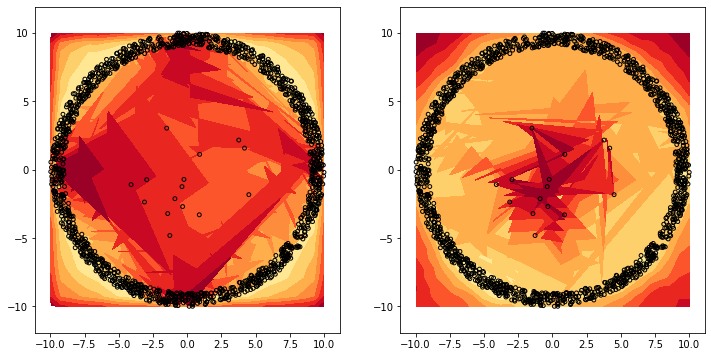

In [79]:
from math import sqrt
import math
import eif as iso
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
#Nobjs = 500
Nobjs = 900
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
#X = pd.DataFrame(X)
#x_min = -5. ; x_max = 5.
#y_min = -5 ; y_max = 5.

X_brut2 = X_brut

to_delete = len(X_brut2) - math.floor(sqrt(len(X_brut2)))**2
print(to_delete)
if to_delete > 0:
    for i in range(to_delete):
        #X = np.delete(X, i)
        X_brut2.drop([i], inplace=True)
    X_brut2.reset_index(drop=True, inplace=True)

X = X_brut2.to_numpy()
x = X_brut2[0].to_numpy()
y = X_brut2[1].to_numpy()
x_min = np.min(X_brut2[0]) ; x_max = np.max(X_brut2[0])
y_min = np.min(X_brut2[1]) ; y_max = np.max(X_brut2[1])
        
n_shape = round(sqrt(len(x)))
m_x = x.reshape((n_shape, n_shape))
m_y = y.reshape((n_shape, n_shape))

#*****************************************************************************
F0  = IFD.IsolationForest(sample_size = 256, n_trees=200)
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)

#m_size = sqrt(len(x))
m_size = 30
xx, yy = np.meshgrid(np.linspace(x_min, x_max, m_size), np.linspace(y_min, y_max, m_size))

xxx = np.c_[xx.ravel(), yy.ravel()]
F0.fit(pd.DataFrame(X))
IFM_y_pred_IF, S0 = F0.predict(X=pd.DataFrame(xxx), threshold=0.6)
IFM_y_pred_IF1, S01 = F0.predict(X=pd.DataFrame(X), threshold=0.6)

print(len(S0))
print(len(S01))

#S0 = np.append(S0, S01)
#print(len(S0))

print(S0.shape)
S0 = S0.reshape(xx.shape)


S01 = S01.reshape(m_x.shape)


#*****************************************************************************
S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

S11 = F1.compute_paths(X_in=X)
S11 = S11.reshape(m_x.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")

levels1 = np.linspace(np.min(S01),np.max(S01),10)
CS = ax1.contourf(m_x, m_y, S01, levels1, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")

levels11 = np.linspace(np.min(S11),np.max(S11),10)
CS = ax2.contourf(m_x, m_y, S11, levels11, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

(900,)


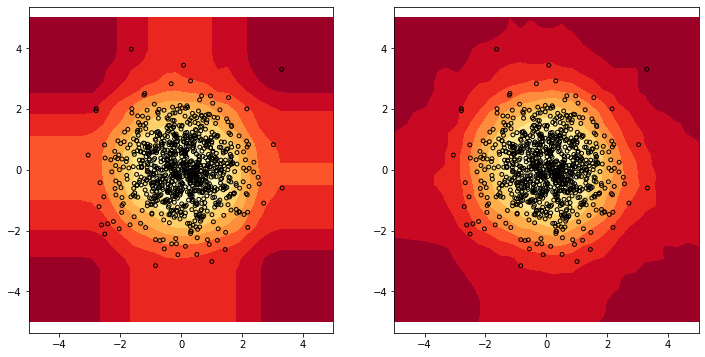

In [25]:

import eif as iso
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
#Nobjs = 500
Nobjs = 900
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
#X = pd.DataFrame(X)

F0  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=0) # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)

xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))

S0 = F0.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
print(S0.shape)
S0 = S0.reshape(xx.shape)


S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

In [26]:
S0 = F0.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S0 = S0.reshape(xx.shape)

S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

71
900
1444
(900, 1)


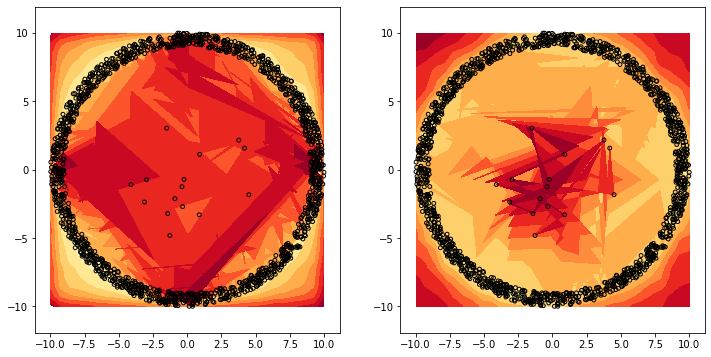

In [10]:
# Tracer une heatMap de chaque jeu de données et superposer les heatMap.
from math import sqrt
import math
import eif as iso
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
#Nobjs = 500
Nobjs = 900
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
#X = pd.DataFrame(X)
#x_min = -5. ; x_max = 5.
#y_min = -5 ; y_max = 5.

X_brut2 = X_brut

to_delete = len(X_brut2) - math.floor(sqrt(len(X_brut2)))**2
print(to_delete)
if to_delete > 0:
    for i in range(to_delete):
        #X = np.delete(X, i)
        X_brut2.drop([i], inplace=True)
    X_brut2.reset_index(drop=True, inplace=True)

X = X_brut2.to_numpy()
x = X_brut2[0].to_numpy()
y = X_brut2[1].to_numpy()
x_min = np.min(X_brut2[0]) ; x_max = np.max(X_brut2[0])
y_min = np.min(X_brut2[1]) ; y_max = np.max(X_brut2[1])
        
n_shape = round(sqrt(len(x)))
m_x = x.reshape((n_shape, n_shape))
m_y = y.reshape((n_shape, n_shape))

#*****************************************************************************
F0  = IFD.IsolationForest(sample_size = 256, n_trees=200)
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)

#m_size = sqrt(len(x))
m_size = 30
xx, yy = np.meshgrid(np.linspace(x_min, x_max, m_size), np.linspace(y_min, y_max, m_size))

xxx = np.c_[xx.ravel(), yy.ravel()]
F0.fit(pd.DataFrame(X))
IFM_y_pred_IF, S0 = F0.predict(X=pd.DataFrame(xxx), threshold=0.6)
IFM_y_pred_IF1, S01 = F0.predict(X=pd.DataFrame(X), threshold=0.6)

print(len(S0))
print(len(S01))

#S0 = np.append(S0, S01)
#print(len(S0))

print(S0.shape)
S0 = S0.reshape(xx.shape)


S01 = S01.reshape(m_x.shape)


#*****************************************************************************
S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

S11 = F1.compute_paths(X_in=X)
S11 = S11.reshape(m_x.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")

levels1 = np.linspace(np.min(S01),np.max(S01),10)
CS = ax1.contourf(m_x, m_y, S01, levels1, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")

levels11 = np.linspace(np.min(S11),np.max(S11),10)
CS = ax2.contourf(m_x, m_y, S11, levels11, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

0


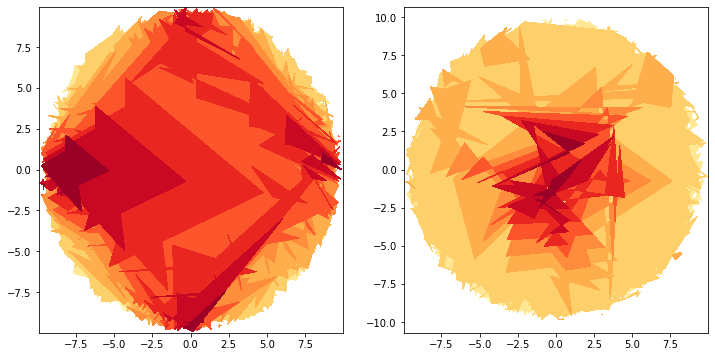

In [27]:
# Mélanger les deux jeux de données et faire une seule heatMap
from math import sqrt
import math
import eif as iso


X_brut2 = X_brut

to_delete = len(X_brut2) - math.floor(sqrt(len(X_brut2)))**2
print(to_delete)
if to_delete > 0:
    for i in range(to_delete):
        #X = np.delete(X, i)
        X_brut2.drop([i], inplace=True)
    X_brut2.reset_index(drop=True, inplace=True)

X = X_brut2.to_numpy()
x = X_brut2[0].to_numpy()
y = X_brut2[1].to_numpy()

x_min = np.min(X_brut2[0]) ; x_max = np.max(X_brut2[0])
y_min = np.min(X_brut2[1]) ; y_max = np.max(X_brut2[1])
        
n_shape = round(sqrt(len(x)))
m_x = x.reshape((n_shape, n_shape))
m_y = y.reshape((n_shape, n_shape))

#*****************************************************************************
F0  = IFD.IsolationForest(sample_size = 256, n_trees=200)

F0.fit(pd.DataFrame(X))
IFM_y_pred_IF1, S01 = F0.predict(X=pd.DataFrame(X), threshold=0.6)
scores_F0 = S01
S01 = S01.reshape(m_x.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels1 = np.linspace(np.min(S01),np.max(S01),10)
CS = ax1.contourf(m_x, m_y, S01, levels1, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")


#*****************************************************************************
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)
S11 = F1.compute_paths(X_in=X)
S11 = S11.reshape(m_x.shape)


ax2 = f.add_subplot(122)
levels11 = np.linspace(np.min(S11),np.max(S11),10)
CS = ax2.contourf(m_x, m_y, S11, levels11, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

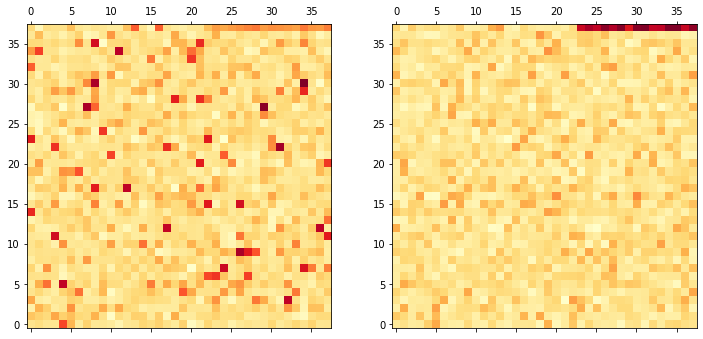

In [46]:
# Mélanger les deux jeux de données et faire une seule heatMap
from math import sqrt
import math
import eif as iso


X_brut2 = X_brut

n_shape = round(sqrt(len(X_brut2)))
#*****************************************************************************
F0  = IFD.IsolationForest(sample_size = 256, n_trees=200)

F0.fit(pd.DataFrame(X))
IFM_y_pred_IF1, S01 = F0.predict(X=pd.DataFrame(X), threshold=0.6)
scores_F0 = S01
S01 = S01.reshape(n_shape,n_shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
ax1.matshow(S01, origin = 'lower', cmap = plt.cm.YlOrRd)

#levels1 = np.linspace(np.min(S01),np.max(S01),10)
#CS = ax1.contourf(m_x, m_y, S01, levels1, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")


#*****************************************************************************
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)
S11 = F1.compute_paths(X_in=X)
S11 = S11.reshape(n_shape,n_shape)


ax2 = f.add_subplot(122)
ax2.matshow(S11, origin = 'lower', cmap = plt.cm.YlOrRd)

#levels11 = np.linspace(np.min(S11),np.max(S11),10)
#CS = ax2.contourf(m_x, m_y, S11, levels11, cmap=plt.cm.YlOrRd)
#plt.scatter(x,y,s=15,c='None',edgecolor='k')
#plt.axis("equal")


plt.show()

1444
[0.54231302 0.55584783 0.56938265 0.58291747 0.59645228 0.6099871
 0.62352191 0.63705673 0.65059155 0.66412636 0.67766118]


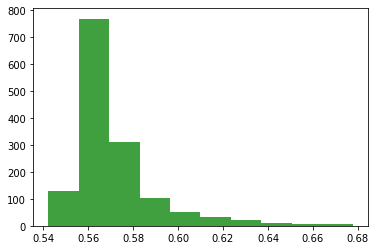

In [34]:
n, bins, patches = plt.hist(scores_F0, density=False, facecolor='g', alpha=0.75)
sigma = np.std(scores_F0)
mu = np.mean(scores_F0)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), 
#                 linewidth=2, color='r')
print(len(scores_F0))
print(bins)
#print(n)
#print(patches)

In [37]:
100*100/1444

6.925207756232687

1444
[0.54231302 0.55584783 0.56938265 0.58291747 0.59645228 0.6099871
 0.62352191 0.63705673 0.65059155 0.66412636 0.67766118]


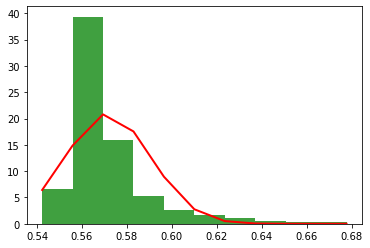

In [41]:
n, bins, patches = plt.hist(scores_F0, density=True, facecolor='g', alpha=0.75)
sigma = np.std(scores_F0)
mu = np.mean(scores_F0)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), 
                 linewidth=2, color='r')
print(len(scores_F0))
print(bins)
#print(n)
#print(patches)

python: 3.7.6
matplotlib: 3.1.3
[['col1', 'col2', 'col3'], ['row1', 'row2', 'row3'], ['col1', 'col2', 'col3'], ['row1', 'row2', 'row3']]


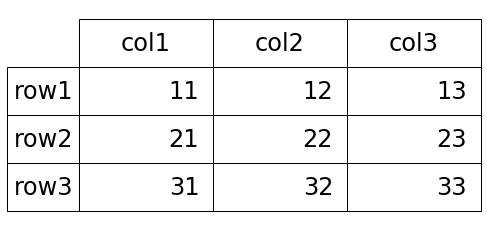

In [6]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['col1', 'col2', 'col3']
row_labels = ['row1', 'row2', 'row3']
table_vals = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 4)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
#plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)

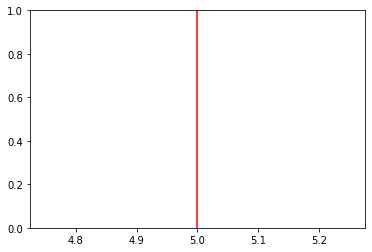

In [15]:
import matplotlib.pyplot as plt
plt.axvline(x=5, color="r")

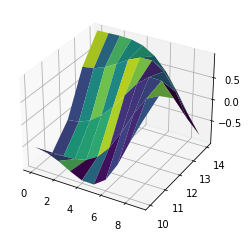

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# as plot_surface needs 2D arrays as input
x = np.arange(10)
y = np.array(range(10,15))
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# data_value shall be represented by color
data_value = np.random.rand(len(y), len(x))
# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)


# plot_surface with points X,Y,Z and data_value as colors
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
                       linewidth=0, antialiased=True)

plt.show()